## Modele

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_columns')

In [3]:
df=pd.read_csv("pl_data_with_weather2.csv")
df.head()

,season,datetime,round,referee,formation_home,formation_away,home_team,away_team,home_minutes,home_goals,home_assists,home_pens_made,home_pens_att,home_shots,home_shots_on_target,home_cards_yellow,home_cards_red,home_touches,home_tackles,home_interceptions,home_blocks,home_xg,home_npxg,home_xg_assist,home_sca,home_gca,home_passes_completed,home_passes,home_passes_pct,home_progressive_passes,home_carries,home_progressive_carries,home_take_ons,home_take_ons_won,home_passes_total_distance,home_passes_progressive_distance,home_passes_completed_short,home_passes_short,home_passes_pct_short,home_passes_completed_medium,home_passes_medium,home_passes_pct_medium,home_passes_completed_long,home_passes_long,home_passes_pct_long,home_pass_xa,home_assisted_shots,home_passes_into_final_third,home_passes_into_penalty_area,home_crosses_into_penalty_area,home_passes_live,home_passes_dead,home_passes_free_kicks,home_through_balls,home_passes_switches,home_crosses,home_throw_ins,home_corner_kicks,home_corner_kicks_in,home_corner_kicks_out,home_corner_kicks_straight,home_passes_offsides,home_passes_blocked,home_tackles_won,home_tackles_def_3rd,home_tackles_mid_3rd,home_tackles_att_3rd,home_challenge_tackles,home_challenges,home_challenge_tackles_pct,home_challenges_lost,home_blocked_shots,home_blocked_passes,home_tackles_interceptions,home_clearances,home_errors,home_touches_def_pen_area,home_touches_def_3rd,home_touches_mid_3rd,home_touches_att_3rd,home_touches_att_pen_area,home_touches_live_ball,home_take_ons_won_pct,home_take_ons_tackled,home_take_ons_tackled_pct,home_carries_distance,home_carries_progressive_distance,home_carries_into_final_third,home_carries_into_penalty_area,home_miscontrols,home_dispossessed,home_passes_received,home_progressive_passes_received,home_cards_yellow_red,home_fouls,home_fouled,home_offsides,home_pens_won,home_pens_conceded,home_own_goals,home_ball_recoveries,home_aerials_won,home_aerials_lost,home_aerials_won_pct,away_minutes,away_goals,away_assists,away_pens_made,away_pens_att,away_shots,away_shots_on_target,away_cards_yellow,away_cards_red,away_touches,away_tackles,away_interceptions,away_blocks,away_xg,away_npxg,away_xg_assist,away_sca,away_gca,away_passes_completed,away_passes,away_passes_pct,away_progressive_passes,away_carries,away_progressive_carries,away_take_ons,away_take_ons_won,away_passes_total_distance,away_passes_progressive_distance,away_passes_completed_short,away_passes_short,away_passes_pct_short,away_passes_completed_medium,away_passes_medium,away_passes_pct_medium,away_passes_completed_long,away_passes_long,away_passes_pct_long,away_pass_xa,away_assisted_shots,away_passes_into_final_third,away_passes_into_penalty_area,away_crosses_into_penalty_area,away_passes_live,away_passes_dead,away_passes_free_kicks,away_through_balls,away_passes_switches,away_crosses,away_throw_ins,away_corner_kicks,away_corner_kicks_in,away_corner_kicks_out,away_corner_kicks_straight,away_passes_offsides,away_passes_blocked,away_tackles_won,away_tackles_def_3rd,away_tackles_mid_3rd,away_tackles_att_3rd,away_challenge_tackles,away_challenges,away_challenge_tackles_pct,away_challenges_lost,away_blocked_shots,away_blocked_passes,away_tackles_interceptions,away_clearances,away_errors,away_touches_def_pen_area,away_touches_def_3rd,away_touches_mid_3rd,away_touches_att_3rd,away_touches_att_pen_area,away_touches_live_ball,away_take_ons_won_pct,away_take_ons_tackled,away_take_ons_tackled_pct,away_carries_distance,away_carries_progressive_distance,away_carries_into_final_third,away_carries_into_penalty_area,away_miscontrols,away_dispossessed,away_passes_received,away_progressive_passes_received,away_cards_yellow_red,away_fouls,away_fouled,away_offsides,away_pens_won,away_pens_conceded,away_own_goals,away_ball_recoveries,away_aerials_won,away_aerials_lost,away_aerials_won_pct,home_goals_conceded,away_goals_conceded,outcome,home_points,away_points,home_goals_last5,home_assists_last5,home_pens_made_last5,home_pens_att_last5,home

In [4]:
df=df.sort_values(["season", "datetime", "round"])

In [5]:
df['outcome'] = df['outcome'].replace({2: 0, 0: 0.5})

In [6]:
df['total_goals']=df['home_goals']+df['away_goals']

#### Wstępna eksploracja danych

In [70]:
import matplotlib.pyplot as plt

In [71]:
def plot_match_outcomes(df, title_name):
    season_outcomes = df.groupby('season')['outcome'].value_counts(normalize=True).unstack()
    season_outcomes.columns = ['away win', 'draw', 'home win']
    season_outcomes = season_outcomes * 100

    # Rysowanie wykresu
    season_outcomes.plot(kind='bar', figsize=(10, 5), color=['blue', 'green', 'red'])
    plt.title(title_name)
    plt.xlabel('season')
    plt.xticks(rotation=30)
    plt.ylabel('percentage')
    plt.legend(title='match outcome', loc='center left', bbox_to_anchor=(1, 1))
    plt.show()

    mean_all = season_outcomes.mean()
    season_outcomes.loc['average'] = mean_all
    print(season_outcomes)

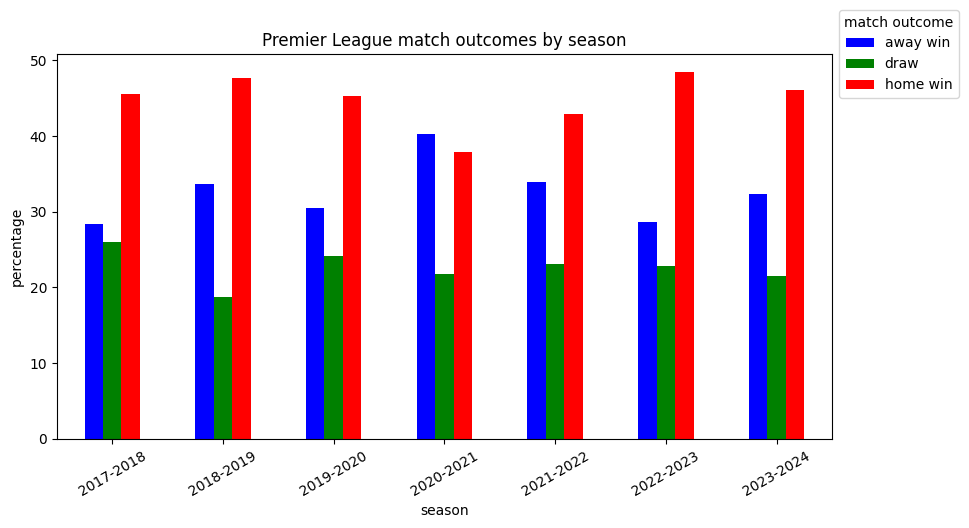

            away win       draw   home win
season                                    
2017-2018  28.421053  26.052632  45.526316
2018-2019  33.684211  18.684211  47.631579
2019-2020  30.526316  24.210526  45.263158
2020-2021  40.263158  21.842105  37.894737
2021-2022  33.947368  23.157895  42.894737
2022-2023  28.684211  22.894737  48.421053
2023-2024  32.368421  21.578947  46.052632
average    32.556391  22.631579  44.812030


In [9]:
plot_match_outcomes(df, 'Premier League match outcomes by season')

In [10]:
def goals_num(total_goals):
    if total_goals <= 2:
        return '0-2'
    elif total_goals <= 4:
        return '3-4'
    else:
        return '5+'

def plot_total_goals(df, title_name, unstack=True):
    season_goals_num = df.groupby('season').apply(
    lambda x: x['total_goals'].apply(goals_num).value_counts(normalize=True) * 100
    )
    if unstack:
        season_goals_num=season_goals_num.unstack()

    colors=["#9496fa", "#6568f9", "#3337fb"]
    season_goals_num.plot(kind='bar', figsize=(10, 5), color=colors)
    plt.title(title_name)
    plt.xlabel('season')
    plt.xticks(rotation=30)
    plt.ylabel('percentage')
    plt.legend(title='match total goals', loc='center left', bbox_to_anchor=(1, 1))
    plt.show()

    mean_all = season_goals_num.mean()
    season_goals_num.loc['average'] = mean_all
    print(season_goals_num)


C:\Users\Kuba\AppData\Local\Temp\ipykernel_10696\3933823159.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_goals_num = df.groupby('season').apply(


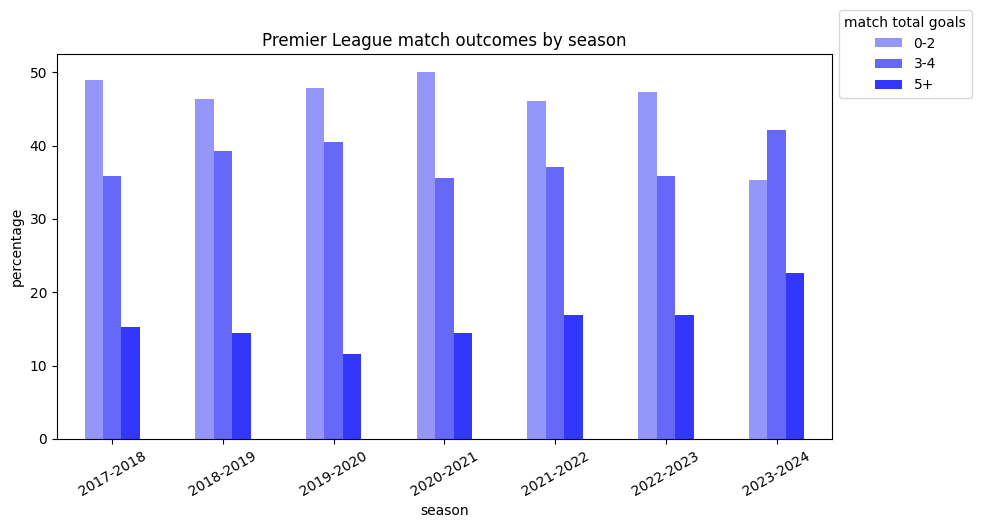

total_goals        0-2        3-4         5+
season                                      
2017-2018    48.947368  35.789474  15.263158
2018-2019    46.315789  39.210526  14.473684
2019-2020    47.894737  40.526316  11.578947
2020-2021    50.000000  35.526316  14.473684
2021-2022    46.052632  37.105263  16.842105
2022-2023    47.368421  35.789474  16.842105
2023-2024    35.263158  42.105263  22.631579
average      45.977444  38.007519  16.015038


In [11]:
plot_total_goals(df, "Premier League match outcomes by season")

C:\Users\Kuba\AppData\Local\Temp\ipykernel_10696\3933823159.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_goals_num = df.groupby('season').apply(


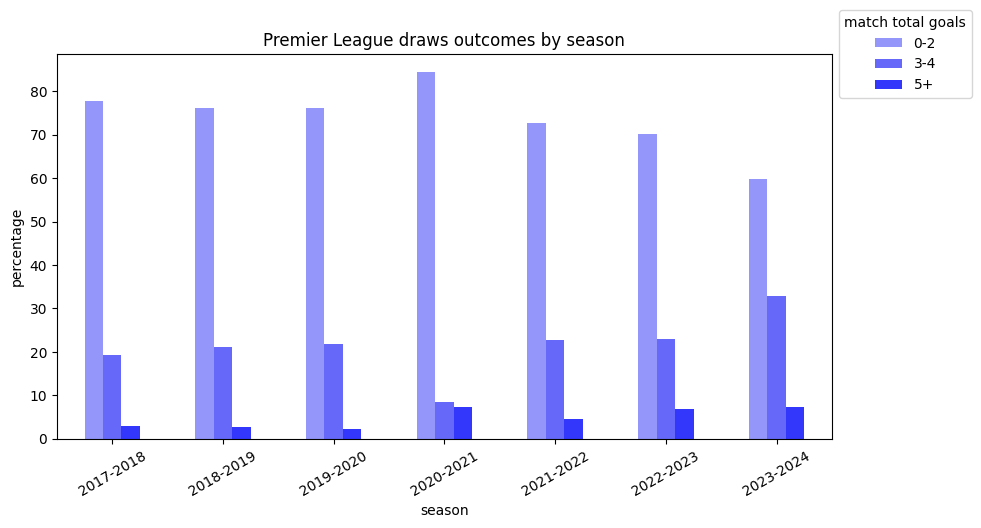

total_goals        0-2        3-4        5+
season                                     
2017-2018    77.777778  19.191919  3.030303
2018-2019    76.056338  21.126761  2.816901
2019-2020    76.086957  21.739130  2.173913
2020-2021    84.337349   8.433735  7.228916
2021-2022    72.727273  22.727273  4.545455
2022-2023    70.114943  22.988506  6.896552
2023-2024    59.756098  32.926829  7.317073
average      73.836676  21.304879  4.858445


In [12]:
df_draws=df[df['outcome']==0.5]
plot_total_goals(df_draws, "Premier League draws outcomes by season", unstack=False)

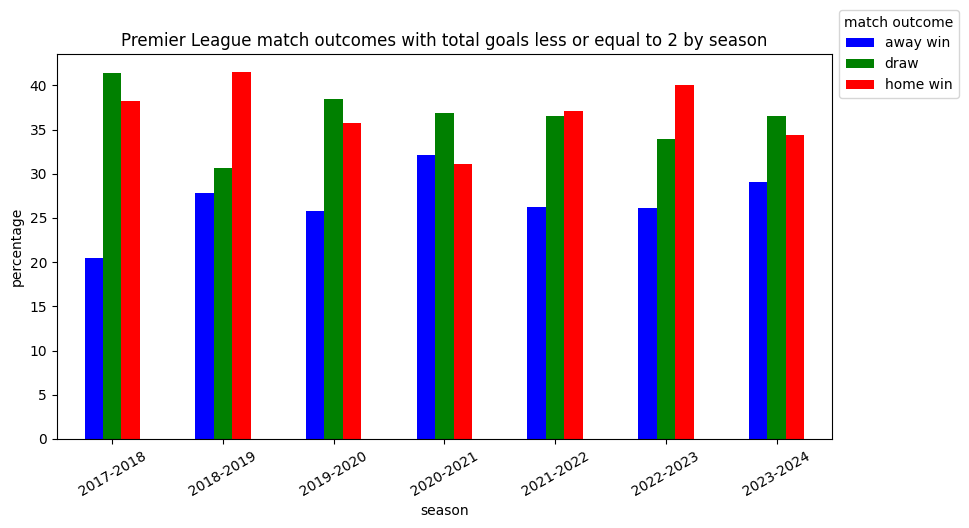

            away win       draw   home win
season                                    
2017-2018  20.430108  41.397849  38.172043
2018-2019  27.840909  30.681818  41.477273
2019-2020  25.824176  38.461538  35.714286
2020-2021  32.105263  36.842105  31.052632
2021-2022  26.285714  36.571429  37.142857
2022-2023  26.111111  33.888889  40.000000
2023-2024  29.104478  36.567164  34.328358
average    26.814537  36.344399  36.841064


In [17]:
df_total_goals_less_eq_2=df[df['total_goals']<=2]
plot_match_outcomes(df_total_goals_less_eq_2, 'Premier League match outcomes with total goals less or equal to 2 by season')


In [18]:
print(f"Average number of goals per match {np.mean(df['total_goals'])}")

Average number of goals per match 2.8379699248120303


### Rozkład Poissona

Zakładamy, że liczba strzelanych w meczu bramek przez drużynę ma rozkład Poissona. Oczywiście drużyna ma większe szanse na strzelenie goli gdy gra ze słabszą drużyną, w szczególności taką która ma słabą obronę. Należy więc uwzględnić siłę ataku danej drużyny i siłę obrony przeciwnika. Robimy to znajdując odpowiednią formułę na paramater lambda.

#### Obliczanie średniej liczby goli w ostatnich meczach dla całej ligi

In [35]:
df_avg_league_home = df.groupby(["season", "round"]).agg(
    home_scored_avg_league_last5=("home_goals_last5", "mean"),
    home_scored_avg_league_last10=("home_goals_last10", "mean"),
    home_scored_avg_league_last20=("home_goals_last20", "mean"),
    home_conceded_avg_league_last5=("home_goals_conceded_last5", "mean"),
    home_conceded_avg_league_last10=("home_goals_conceded_last10", "mean"),
    home_conceded_avg_league_last20=("home_goals_conceded_last20", "mean"),
).reset_index()

df_avg_league_away= df.groupby(["season", "round"]).agg(
    away_scored_avg_league_last5=("away_goals_last5", "mean"),
    away_scored_avg_league_last10=("away_goals_last10", "mean"),
    away_scored_avg_league_last20=("away_goals_last20", "mean"),
    away_conceded_avg_league_last5=("away_goals_conceded_last5", "mean"),
    away_conceded_avg_league_last10=("away_goals_conceded_last10", "mean"),
    away_conceded_avg_league_last20=("away_goals_conceded_last20", "mean"),
).reset_index()

In [45]:
foot_df=df.merge(df_avg_league_home, on=["season", "round"], how='left')
foot_df=foot_df.merge(df_avg_league_away, on=["season", "round"], how='left')
foot_df.tail()

,season,datetime,round,referee,formation_home,formation_away,home_team,away_team,home_minutes,home_goals,home_assists,home_pens_made,home_pens_att,home_shots,home_shots_on_target,home_cards_yellow,home_cards_red,home_touches,home_tackles,home_interceptions,home_blocks,home_xg,home_npxg,home_xg_assist,home_sca,home_gca,home_passes_completed,home_passes,home_passes_pct,home_progressive_passes,home_carries,home_progressive_carries,home_take_ons,home_take_ons_won,home_passes_total_distance,home_passes_progressive_distance,home_passes_completed_short,home_passes_short,home_passes_pct_short,home_passes_completed_medium,home_passes_medium,home_passes_pct_medium,home_passes_completed_long,home_passes_long,home_passes_pct_long,home_pass_xa,home_assisted_shots,home_passes_into_final_third,home_passes_into_penalty_area,home_crosses_into_penalty_area,home_passes_live,home_passes_dead,home_passes_free_kicks,home_through_balls,home_passes_switches,home_crosses,home_throw_ins,home_corner_kicks,home_corner_kicks_in,home_corner_kicks_out,home_corner_kicks_straight,home_passes_offsides,home_passes_blocked,home_tackles_won,home_tackles_def_3rd,home_tackles_mid_3rd,home_tackles_att_3rd,home_challenge_tackles,home_challenges,home_challenge_tackles_pct,home_challenges_lost,home_blocked_shots,home_blocked_passes,home_tackles_interceptions,home_clearances,home_errors,home_touches_def_pen_area,home_touches_def_3rd,home_touches_mid_3rd,home_touches_att_3rd,home_touches_att_pen_area,home_touches_live_ball,home_take_ons_won_pct,home_take_ons_tackled,home_take_ons_tackled_pct,home_carries_distance,home_carries_progressive_distance,home_carries_into_final_third,home_carries_into_penalty_area,home_miscontrols,home_dispossessed,home_passes_received,home_progressive_passes_received,home_cards_yellow_red,home_fouls,home_fouled,home_offsides,home_pens_won,home_pens_conceded,home_own_goals,home_ball_recoveries,home_aerials_won,home_aerials_lost,home_aerials_won_pct,away_minutes,away_goals,away_assists,away_pens_made,away_pens_att,away_shots,away_shots_on_target,away_cards_yellow,away_cards_red,away_touches,away_tackles,away_interceptions,away_blocks,away_xg,away_npxg,away_xg_assist,away_sca,away_gca,away_passes_completed,away_passes,away_passes_pct,away_progressive_passes,away_carries,away_progressive_carries,away_take_ons,away_take_ons_won,away_passes_total_distance,away_passes_progressive_distance,away_passes_completed_short,away_passes_short,away_passes_pct_short,away_passes_completed_medium,away_passes_medium,away_passes_pct_medium,away_passes_completed_long,away_passes_long,away_passes_pct_long,away_pass_xa,away_assisted_shots,away_passes_into_final_third,away_passes_into_penalty_area,away_crosses_into_penalty_area,away_passes_live,away_passes_dead,away_passes_free_kicks,away_through_balls,away_passes_switches,away_crosses,away_throw_ins,away_corner_kicks,away_corner_kicks_in,away_corner_kicks_out,away_corner_kicks_straight,away_passes_offsides,away_passes_blocked,away_tackles_won,away_tackles_def_3rd,away_tackles_mid_3rd,away_tackles_att_3rd,away_challenge_tackles,away_challenges,away_challenge_tackles_pct,away_challenges_lost,away_blocked_shots,away_blocked_passes,away_tackles_interceptions,away_clearances,away_errors,away_touches_def_pen_area,away_touches_def_3rd,away_touches_mid_3rd,away_touches_att_3rd,away_touches_att_pen_area,away_touches_live_ball,away_take_ons_won_pct,away_take_ons_tackled,away_take_ons_tackled_pct,away_carries_distance,away_carries_progressive_distance,away_carries_into_final_third,away_carries_into_penalty_area,away_miscontrols,away_dispossessed,away_passes_received,away_progressive_passes_received,away_cards_yellow_red,away_fouls,away_fouled,away_offsides,away_pens_won,away_pens_conceded,away_own_goals,away_ball_recoveries,away_aerials_won,away_aerials_lost,away_aerials_won_pct,home_goals_conceded,away_goals_conceded,outcome,home_points,away_points,home_goals_last5,home_assists_last5,home_pens_made_last5,home_pens_att_last5,home

In [46]:
epsilon = 1e-9

foot_df["offensive_power_home"] = (
    6 / 10 * (foot_df['home_goals_last5'] / (foot_df['home_scored_avg_league_last5'] + epsilon)) +
    3 / 10 * (foot_df['home_goals_last10'] / (foot_df['home_scored_avg_league_last10'] + epsilon)) +
    1 / 10 * (foot_df['home_goals_last20'] / (foot_df['home_scored_avg_league_last20'] + epsilon))
)

foot_df["defensive_power_home"] = (
    6 / 10 * (foot_df['home_goals_conceded_last5'] / (foot_df['home_conceded_avg_league_last5'] + epsilon)) +
    3 / 10 * (foot_df['home_goals_conceded_last10'] / (foot_df['home_conceded_avg_league_last10'] + epsilon)) +
    1 / 10 * (foot_df['home_goals_conceded_last20'] / (foot_df['home_conceded_avg_league_last20'] + epsilon))
)

foot_df["offensive_power_away"] = (
    6 / 10 * (foot_df['away_goals_last5'] / (foot_df['away_scored_avg_league_last5'] + epsilon)) +
    3 / 10 * (foot_df['away_goals_last10'] / (foot_df['away_scored_avg_league_last10'] + epsilon)) +
    1 / 10 * (foot_df['away_goals_last20'] / (foot_df['away_scored_avg_league_last20'] + epsilon))
)

foot_df["defensive_power_away"] = (
    6 / 10 * (foot_df['away_goals_conceded_last5'] / (foot_df['away_conceded_avg_league_last5'] + epsilon)) +
    3 / 10 * (foot_df['away_goals_conceded_last10'] / (foot_df['away_conceded_avg_league_last10'] + epsilon)) +
    1 / 10 * (foot_df['away_goals_conceded_last20'] / (foot_df['away_conceded_avg_league_last20'] + epsilon))
)

In [10]:
from scipy.stats import poisson

In [57]:
foot_df["poisson_goals_home"] = foot_df["offensive_power_home"] * foot_df["defensive_power_away"] * (
    6 / 10 * foot_df["home_scored_avg_league_last5"] +
    3 / 10 * foot_df["home_scored_avg_league_last10"] +
    1 / 10 * foot_df["home_scored_avg_league_last20"]
)

foot_df["poisson_goals_away"] = foot_df["offensive_power_away"] * foot_df["defensive_power_home"] * (
    6 / 10 * foot_df["away_scored_avg_league_last5"] +
    3 / 10 * foot_df["away_scored_avg_league_last10"] +
    1 / 10 * foot_df["away_scored_avg_league_last20"]
)

In [25]:
import statsmodels
import statsmodels.api as sm

In [62]:
X_home=foot_df[["offensive_power_home", "defensive_power_away", "home_goals_last5"]]
y_home=foot_df["home_goals"]

model_home = statsmodels.discrete.discrete_model.Poisson(y_home, X_home)
model_home = model_home.fit()
print(model_home.summary())

lambda_home_pred=model_home.predict(X_home)
foot_df["poisson_lambda_home"]=lambda_home_pred

X_away=foot_df[["offensive_power_away", "defensive_power_home", "away_goals_last5"]]
y_away=foot_df["away_goals"]

model_away = statsmodels.discrete.discrete_model.Poisson(y_away, X_away)
model_away = model_away.fit()
print(model_away.summary())

lambda_away_pred=model_away.predict(X_away)
foot_df["poisson_lambda_away"]=lambda_away_pred

Optimization terminated successfully.
         Current function value: 1.565615
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:             home_goals   No. Observations:                 2660
Model:                        Poisson   Df Residuals:                     2657
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                 0.02478
Time:                        21:04:25   Log-Likelihood:                -4164.5
converged:                       True   LL-Null:                       -4270.4
Covariance Type:            nonrobust   LLR p-value:                 1.105e-46
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
offensive_power_home     0.2520      0.084      3.000      0.003       0.087       0.417

#### Pomocnicze funkcje do przewidywania wyników

In [52]:
def calculate_pred_result_matrix(row, poiss_goals_home, poiss_goals_away):
    home_goals=np.array([poisson.pmf(i, row[poiss_goals_home]) for i in range(8)])
    away_goals=np.array([poisson.pmf(i, row[poiss_goals_away]) for i in range(8)])
    x_grid, y_grid=np.meshgrid(home_goals, away_goals, indexing='ij')
    pred_results_matrix=(x_grid*100).T*y_grid.T
    return pred_results_matrix

In [53]:
def calculate_probabilities_of_win(row, poiss_goals_home, poiss_goals_away):
    pred_results_matrix=calculate_pred_result_matrix(row, poiss_goals_home, poiss_goals_away)
    prob_win_home=np.triu(pred_results_matrix).sum()-np.trace(pred_results_matrix)
    prob_win_away=np.tril(pred_results_matrix).sum()-np.trace(pred_results_matrix)
    prob_draw=100-prob_win_home-prob_win_away
    return prob_win_home, prob_draw, prob_win_away

In [54]:
def calculate_probabilities_of_goals_above(row, goals, poiss_goals_home, poiss_goals_away):
    pred_results_matrix=calculate_pred_result_matrix(row, poiss_goals_home, poiss_goals_away)
    small_matrix=pred_results_matrix[:goals+1, :goals+1]
    small_matrix=np.rot90(small_matrix, k=-1)
    prob=100-np.triu(small_matrix).sum()
    return prob

In [55]:
def check_model_acc(df, poiss_goals_home, poiss_goals_away):
    s=0
    for i in range(df.shape[0]):
        probs=calculate_probabilities_of_win(df.iloc[i], poiss_goals_home, poiss_goals_away)
        p=np.argmax(probs)
        if ((df.iloc[i]['outcome']==1) & (p==0)) | ((df.iloc[i]['outcome']==0.5) & (p==1)) | ((df.iloc[i]['outcome']==0) & (p==2)):
            s+=1
    return s/df.shape[0]

In [22]:
foot_df[['home_goals', 'away_goals', 'outcome']].tail()

,home_goals,away_goals,outcome
2655,2,4,0.0
2656,1,2,0.0
2657,0,3,0.0
2658,3,1,1.0
2659,2,0,1.0


In [58]:
check_model_acc(foot_df, poiss_goals_home="poisson_goals_home", poiss_goals_away="poisson_goals_away")

0.4996240601503759

In [63]:
check_model_acc(foot_df, poiss_goals_home="poisson_lambda_home", poiss_goals_away="poisson_lambda_away")

0.49624060150375937

#### Przewidywanie łącznej liczby bramek w meczu

In [23]:
def check_model_acc_above_goals(df, goals, poiss_goals_home, poiss_goals_away):
    s=0
    for i in range(df.shape[0]):
        prob=calculate_probabilities_of_goals_above(df.iloc[i], goals, poiss_goals_home, poiss_goals_away)
        if ((prob>=50) & (df.iloc[i]['total_goals']>goals)) | ((prob<=50) & (df.iloc[i]['total_goals']<=goals)):
            s+=1
    return s/df.shape[0]

In [31]:
check_model_acc_above_goals(foot_df, 2, poiss_goals_home="poisson_goals_home", poiss_goals_away="poisson_goals_away")

0.5353383458646617

Expected goals

In [24]:
def calc_acc(model_col):
    acc=(
        ((foot_df['total_goals'] > 2) & (model_col > 0.5)).sum() + 
        ((foot_df['total_goals'] <= 2) & (model_col <= 0.5)).sum()
    ) / foot_df.shape[0]
    return acc

In [25]:
lambda1_xg=foot_df['home_xg_last5']
lambda2_xg=foot_df['away_xg_last5']
lambda_total_xg= lambda1_xg+lambda2_xg
calc_acc(1-poisson.cdf(1, lambda_total_xg))

np.float64(0.5526315789473685)

#### Uporządkowany model probitowy

In [26]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

Prosty przykład

In [35]:
X= foot_df[[
    'home_goals_last5', 
    'away_goals_last5', 
]]

y=foot_df['outcome']

In [36]:
mod_prob = OrderedModel(y,X,distr='probit')

res_prob = mod_prob.fit(method='bfgs')

num_of_thresholds = 2
mod_prob.transform_threshold_params(res_prob.params[-num_of_thresholds:])

Optimization terminated successfully.
         Current function value: 1.017138
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13


array([       -inf, -0.35378324,  0.26407689,         inf])

In [37]:
res_prob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                outcome   Log-Likelihood:                -2705.6
Model:                   OrderedModel   AIC:                             5419.
Method:            Maximum Likelihood   BIC:                             5443.
Date:                Mon, 18 Nov 2024                                         
Time:                        10:56:46                                         
No. Observations:                2660                                         
Df Residuals:                    2656                                         
Df Model:                           2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
home_goals_last5     0.3668      0.031     11.751      0.000       0.306       0.428
away_goals_last5    -0.3465      0.034    -10.155      0.000      -0.413      -0.280
0.0/0.5             -0.3538      0.067     -5.308      0.000      -0.484      -0.223
0.5/1.0             -0.4815      0.037    -13.104      0.000      -0.554      -0.409
====================================================================================
"""

Współczynniki są zgodne z intuicją

In [38]:
predicted = res_prob.model.predict(res_prob.params, exog=X)
max_ind = np.argmax(predicted, axis=1)
max_val = np.max(predicted, axis=1)

pred_choice = []
for i, max_value in enumerate(max_val):
    pred_choice.append(max_ind[i]/2)
(pred_choice == y).sum()/len(pred_choice)

np.float64(0.4932330827067669)

In [39]:
features = ['home_goals_last5', 'away_goals_last5', 'home_touches_att_3rd_last5', 'away_touches_att_3rd_last5', 'home_passes_completed_last5', 'away_passes_completed_last5', 'home_pass_xa_last5', 'away_pass_xa_last5', 'home_passes_progressive_distance_last5']
X= foot_df[features]
y=foot_df['outcome']

In [40]:
mod_prob = OrderedModel(y,X,distr='probit')

res_prob = mod_prob.fit(method='bfgs')

num_of_thresholds = 2
mod_prob.transform_threshold_params(res_prob.params[-num_of_thresholds:])

Optimization terminated successfully.
         Current function value: 0.981638
         Iterations: 37
         Function evaluations: 49
         Gradient evaluations: 49


array([       -inf, -0.58163814,  0.06673216,         inf])

In [41]:
predicted = res_prob.model.predict(res_prob.params, exog=X)
max_ind = np.argmax(predicted, axis=1)
max_val = np.max(predicted, axis=1)

pred_choice = []
for i, max_value in enumerate(max_val):
    pred_choice.append(max_ind[i]/2)
(pred_choice == y).sum()/len(pred_choice)

np.float64(0.5304511278195488)

In [42]:
res_prob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                outcome   Log-Likelihood:                -2611.2
Model:                   OrderedModel   AIC:                             5244.
Method:            Maximum Likelihood   BIC:                             5309.
Date:                Mon, 18 Nov 2024                                         
Time:                        10:57:00                                         
No. Observations:                2660                                         
Df Residuals:                    2649                                         
Df Model:                           9                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
home_goals_last5                           0.1310      0.043      3.081      0.002       0.048       0.214
away_goals_last5                          -0.1379      0.042     -3.249      0.001      -0.221      -0.055
home_touches_att_3rd_last5                -0.0002      0.001     -0.188      0.851      -0.002       0.002
away_touches_att_3rd_last5                -0.0022      0.001     -1.656      0.098      -0.005       0.000
home_passes_completed_last5                0.0019      0.001      3.676      0.000       0.001       0.003
away_passes_completed_last5               -0.0010      0.000     -2.530      0.011      -0.002      -0.000
home_pass_xa_last5                         0.4560      0.118      3.869      0.000       0.225       0.687
away_pass_xa_last5                        -0.2723      0.135     -2.024      0.043      -0.536      -0.009
home_passes_progressive_distance_last5    -0.0001      0.000     -1.288      0.198      -0.000    7.13e-05
0.0/0.5                                   -0.5816      0.152     -3.839      0.000      -0.879      -0.285
0.5/1.0                                   -0.4333      0.037    -11.819      0.000      -0.505      -0.361
==========================================================================================================
"""

#### Selekcja zmiennych

In [43]:
numeric_columns = foot_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns.str.endswith('last5')]
X_numeric = foot_df[numeric_columns]
y = foot_df['outcome']

Korelacja ze zmienną zależną

In [44]:
corr_matrix = X_numeric.corrwith(y).abs().sort_values(ascending=False)

top_50_features = corr_matrix.head(50)
print(top_50_features)

home_pass_xa_last5                         0.248718
home_xg_last5                              0.240129
home_passes_received_last5                 0.240064
home_passes_completed_last5                0.239978
home_passes_total_distance_last5           0.237449
home_npxg_last5                            0.236999
home_passes_completed_medium_last5         0.236596
home_xg_assist_last5                       0.234694
home_touches_att_pen_area_last5            0.233481
home_passes_live_last5                     0.232498
home_carries_last5                         0.231037
away_touches_att_pen_area_last5            0.230960
home_passes_completed_short_last5          0.230574
home_passes_medium_last5                   0.230337
away_passes_received_last5                 0.229751
away_passes_completed_medium_last5         0.229739
away_passes_completed_last5                0.229715
away_carries_progressive_distance_last5    0.229312
away_pass_xa_last5                         0.228157
home_passes_

Według Anovy wszytkie zmienne różnicują

In [45]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X_numeric, y)
anova_results = pd.DataFrame({'feature': X_numeric.columns, 'f_value': f_values, 'p_value': p_values})
top_50_anova_features = anova_results[anova_results['p_value'] < 0.05].sort_values(by='f_value', ascending=False).head(50)
print(top_50_anova_features)

                                     feature    f_value       p_value
36                        home_pass_xa_last5  89.929445  1.619014e-38
82                home_passes_received_last5  84.546151  2.530023e-36
17               home_passes_completed_last5  84.484751  2.680374e-36
12                             home_xg_last5  83.285932  8.277771e-36
25          home_passes_total_distance_last5  82.290852  2.112128e-35
30        home_passes_completed_medium_last5  81.625786  3.951584e-35
13                           home_npxg_last5  81.302527  5.358577e-35
14                      home_xg_assist_last5  80.318612  1.354742e-34
41                    home_passes_live_last5  79.045403  4.503140e-34
71           home_touches_att_pen_area_last5  78.973562  4.819080e-34
175  away_carries_progressive_distance_last5  78.385484  8.396210e-34
21                        home_carries_last5  78.208835  9.920440e-34
27         home_passes_completed_short_last5  78.127836  1.070912e-33
169          away_to

In [ ]:
numeric_columns = foot_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns.str.endswith('last5')]
X_numeric = foot_df[numeric_columns]
y_goals_bin = (foot_df['total_goals']>2).astype(int)

In [32]:
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(X_numeric, y_goals_bin)
anova_results = pd.DataFrame({'feature': X_numeric.columns, 'f_value': f_values, 'p_value': p_values})
top_50_anova_features = anova_results[anova_results['p_value'] < 0.05].sort_values(by='f_value', ascending=False).head(50)
print(top_50_anova_features)

                                     feature    f_value       p_value
71           home_touches_att_pen_area_last5  47.600319  6.508052e-12
79      home_carries_into_penalty_area_last5  38.600456  6.017791e-10
36                        home_pass_xa_last5  37.529757  1.033691e-09
39       home_passes_into_penalty_area_last5  34.316944  5.259677e-09
135                away_assisted_shots_last5  32.052140  1.661695e-08
113                           away_sca_last5  30.567602  3.538080e-08
102                         away_shots_last5  30.232509  4.197007e-08
169          away_touches_att_pen_area_last5  29.113526  7.427860e-08
14                      home_xg_assist_last5  29.012609  7.820629e-08
21                        home_carries_last5  27.887626  1.389697e-07
134                       away_pass_xa_last5  27.151116  2.025833e-07
70                home_touches_att_3rd_last5  26.753857  2.482947e-07
83    home_progressive_passes_received_last5  26.568879  2.729805e-07
20             home_

Random forest - feature importance i przewidywanie wyników

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [47]:
y = foot_df['outcome'].astype('str') 

rf = RandomForestClassifier(n_estimators=100, random_state=123)

rf.fit(X_numeric, y)

feature_importance = pd.Series(rf.feature_importances_, index=X_numeric.columns).sort_values(ascending=False)
print(feature_importance)

away_touches_att_3rd_last5                 0.008806
home_xg_last5                              0.008149
home_passes_completed_last5                0.008120
home_pass_xa_last5                         0.008117
home_npxg_last5                            0.008113
away_passes_received_last5                 0.007980
away_xg_last5                              0.007714
home_touches_last5                         0.007595
away_passes_completed_last5                0.007565
home_passes_live_last5                     0.007479
away_aerials_won_pct_last5                 0.007431
home_passes_completed_medium_last5         0.007358
home_passes_received_last5                 0.007275
home_passes_completed_short_last5          0.007142
away_passes_live_last5                     0.007046
home_passes_last5                          0.006836
home_challenge_tackles_pct_last5           0.006820
home_passes_progressive_distance_last5     0.006808
home_passes_completed_long_last5           0.006782
home_touches

In [49]:
features = ['home_goals_last5', 'away_goals_last5', 'home_touches_att_3rd_last5', 'away_touches_att_3rd_last5', 'home_passes_completed_last5', 'away_passes_completed_last5', 'home_pass_xa_last5', 'away_pass_xa_last5', 'home_passes_progressive_distance_last5']
X = foot_df[features] 
y = (foot_df['outcome']).astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

rf = RandomForestClassifier(n_estimators=150, random_state=123)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5137844611528822


In [50]:
import seaborn as sns

<Axes: >

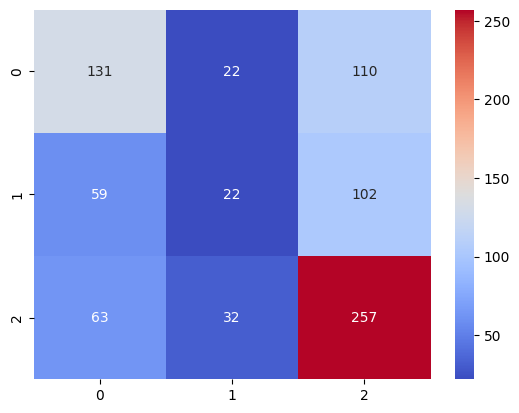

In [51]:
# Obliczenie confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')

#### Metryki pogodowe

In [37]:
foot_df.head()

,season,datetime,round,referee,formation_home,formation_away,home_team,away_team,home_minutes,home_goals,home_assists,home_pens_made,home_pens_att,home_shots,home_shots_on_target,home_cards_yellow,home_cards_red,home_touches,home_tackles,home_interceptions,home_blocks,home_xg,home_npxg,home_xg_assist,home_sca,home_gca,home_passes_completed,home_passes,home_passes_pct,home_progressive_passes,home_carries,home_progressive_carries,home_take_ons,home_take_ons_won,home_passes_total_distance,home_passes_progressive_distance,home_passes_completed_short,home_passes_short,home_passes_pct_short,home_passes_completed_medium,home_passes_medium,home_passes_pct_medium,home_passes_completed_long,home_passes_long,home_passes_pct_long,home_pass_xa,home_assisted_shots,home_passes_into_final_third,home_passes_into_penalty_area,home_crosses_into_penalty_area,home_passes_live,home_passes_dead,home_passes_free_kicks,home_through_balls,home_passes_switches,home_crosses,home_throw_ins,home_corner_kicks,home_corner_kicks_in,home_corner_kicks_out,home_corner_kicks_straight,home_passes_offsides,home_passes_blocked,home_tackles_won,home_tackles_def_3rd,home_tackles_mid_3rd,home_tackles_att_3rd,home_challenge_tackles,home_challenges,home_challenge_tackles_pct,home_challenges_lost,home_blocked_shots,home_blocked_passes,home_tackles_interceptions,home_clearances,home_errors,home_touches_def_pen_area,home_touches_def_3rd,home_touches_mid_3rd,home_touches_att_3rd,home_touches_att_pen_area,home_touches_live_ball,home_take_ons_won_pct,home_take_ons_tackled,home_take_ons_tackled_pct,home_carries_distance,home_carries_progressive_distance,home_carries_into_final_third,home_carries_into_penalty_area,home_miscontrols,home_dispossessed,home_passes_received,home_progressive_passes_received,home_cards_yellow_red,home_fouls,home_fouled,home_offsides,home_pens_won,home_pens_conceded,home_own_goals,home_ball_recoveries,home_aerials_won,home_aerials_lost,home_aerials_won_pct,away_minutes,away_goals,away_assists,away_pens_made,away_pens_att,away_shots,away_shots_on_target,away_cards_yellow,away_cards_red,away_touches,away_tackles,away_interceptions,away_blocks,away_xg,away_npxg,away_xg_assist,away_sca,away_gca,away_passes_completed,away_passes,away_passes_pct,away_progressive_passes,away_carries,away_progressive_carries,away_take_ons,away_take_ons_won,away_passes_total_distance,away_passes_progressive_distance,away_passes_completed_short,away_passes_short,away_passes_pct_short,away_passes_completed_medium,away_passes_medium,away_passes_pct_medium,away_passes_completed_long,away_passes_long,away_passes_pct_long,away_pass_xa,away_assisted_shots,away_passes_into_final_third,away_passes_into_penalty_area,away_crosses_into_penalty_area,away_passes_live,away_passes_dead,away_passes_free_kicks,away_through_balls,away_passes_switches,away_crosses,away_throw_ins,away_corner_kicks,away_corner_kicks_in,away_corner_kicks_out,away_corner_kicks_straight,away_passes_offsides,away_passes_blocked,away_tackles_won,away_tackles_def_3rd,away_tackles_mid_3rd,away_tackles_att_3rd,away_challenge_tackles,away_challenges,away_challenge_tackles_pct,away_challenges_lost,away_blocked_shots,away_blocked_passes,away_tackles_interceptions,away_clearances,away_errors,away_touches_def_pen_area,away_touches_def_3rd,away_touches_mid_3rd,away_touches_att_3rd,away_touches_att_pen_area,away_touches_live_ball,away_take_ons_won_pct,away_take_ons_tackled,away_take_ons_tackled_pct,away_carries_distance,away_carries_progressive_distance,away_carries_into_final_third,away_carries_into_penalty_area,away_miscontrols,away_dispossessed,away_passes_received,away_progressive_passes_received,away_cards_yellow_red,away_fouls,away_fouled,away_offsides,away_pens_won,away_pens_conceded,away_own_goals,away_ball_recoveries,away_aerials_won,away_aerials_lost,away_aerials_won_pct,home_goals_conceded,away_goals_conceded,outcome,home_points,away_points,home_goals_last5,home_assists_last5,home_pens_made_last5,home_pens_att_last5,home

In [38]:
foot_df[['weather_temperature', 'weather_precipitation', 'weather_wind', 'weather_humidity', 'weather_cloud_cover']].mean()

weather_temperature      11.043120
weather_precipitation     0.123872
weather_wind             17.054511
weather_humidity         74.987970
weather_cloud_cover      74.686842
dtype: float64

In [39]:
foot_df_without_rain=foot_df[foot_df["weather_precipitation"]==0]
foot_df_with_rain=foot_df[foot_df["weather_precipitation"]>0]

In [40]:
foot_df_without_rain.shape[0]

1987

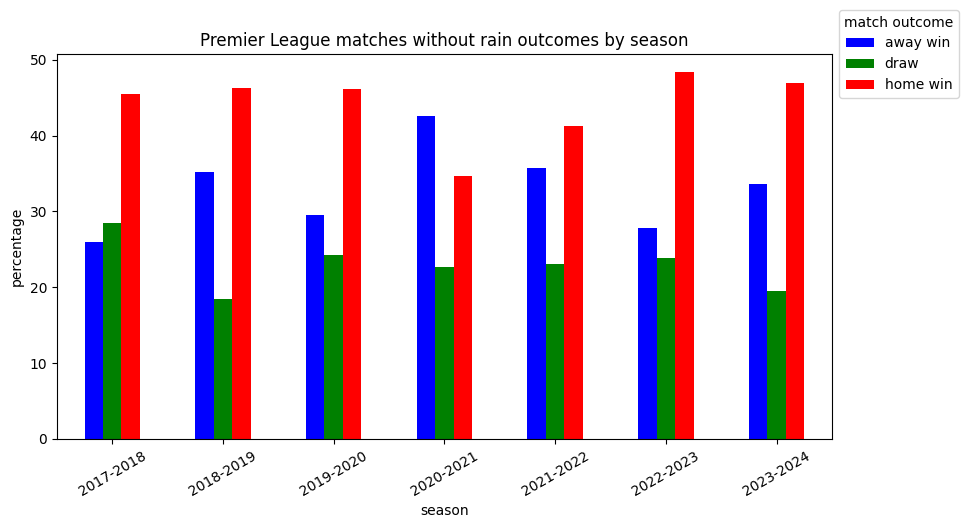

            away win       draw   home win
season                                    
2017-2018  25.992780  28.519856  45.487365
2018-2019  35.191638  18.466899  46.341463
2019-2020  29.577465  24.295775  46.126761
2020-2021  42.641509  22.641509  34.716981
2021-2022  35.738832  23.024055  41.237113
2022-2023  27.777778  23.856209  48.366013
2023-2024  33.574007  19.494585  46.931408
average    32.927715  22.899841  44.172443


In [104]:
plot_match_outcomes(foot_df_without_rain, 'Premier League matches without rain outcomes by season')

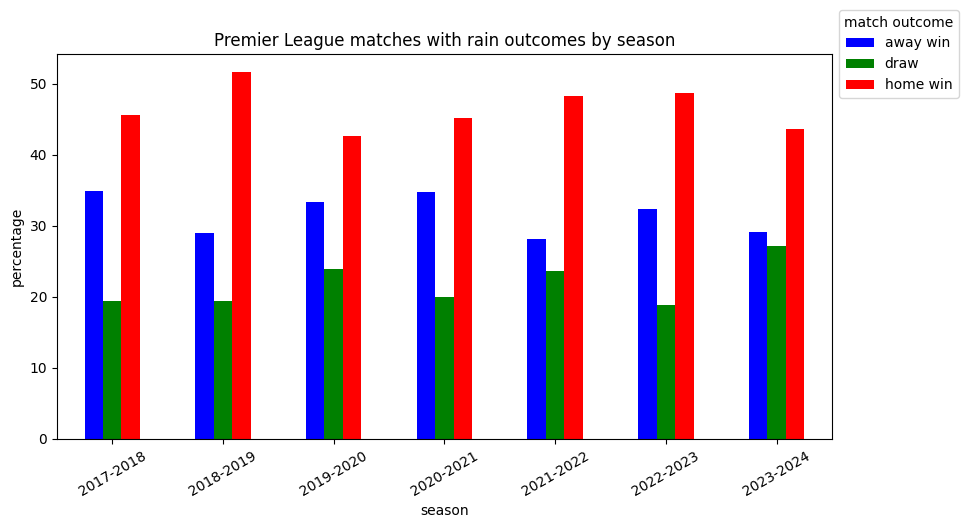

            away win       draw   home win
season                                    
2017-2018  34.951456  19.417476  45.631068
2018-2019  29.032258  19.354839  51.612903
2019-2020  33.333333  23.958333  42.708333
2020-2021  34.782609  20.000000  45.217391
2021-2022  28.089888  23.595506  48.314607
2022-2023  32.432432  18.918919  48.648649
2023-2024  29.126214  27.184466  43.689320
average    31.678313  21.775648  46.546039


In [105]:
plot_match_outcomes(foot_df_with_rain, 'Premier League matches with rain outcomes by season')

In [45]:
print(f"Average number of goals per match without rain {np.mean(foot_df_without_rain['total_goals'])}")

Average number of goals per match without rain 2.8339204831404126


In [46]:
print(f"Average number of goals per match without rain {np.mean(foot_df_with_rain['total_goals'])}")

Average number of goals per match without rain 2.849925705794948


C:\Users\Kuba\AppData\Local\Temp\ipykernel_19492\3933823159.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_goals_num = df.groupby('season').apply(


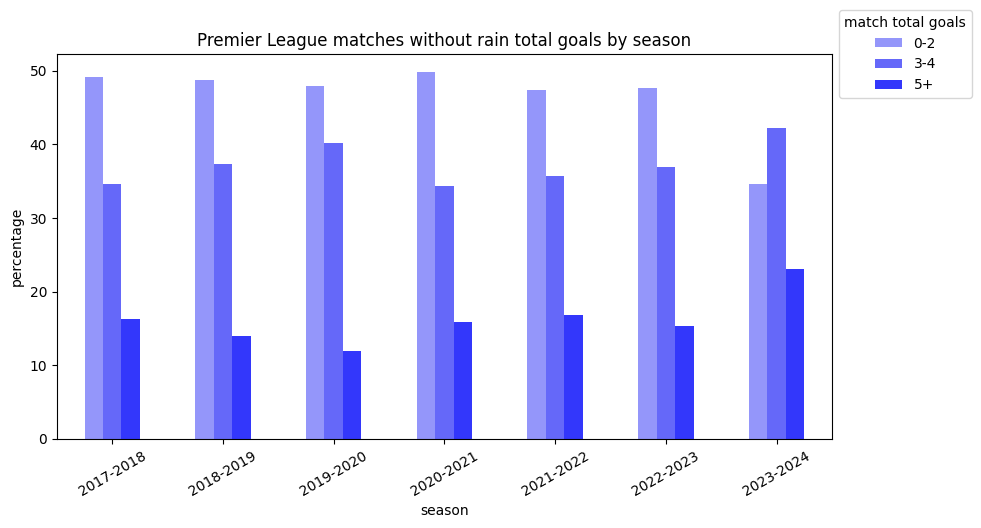

total_goals        0-2        3-4         5+
season                                      
2017-2018    49.097473  34.657040  16.245487
2018-2019    48.780488  37.282230  13.937282
2019-2020    47.887324  40.140845  11.971831
2020-2021    49.811321  34.339623  15.849057
2021-2022    47.422680  35.738832  16.838488
2022-2023    47.712418  36.928105  15.359477
2023-2024    34.657040  42.238267  23.104693
average      46.481249  37.332134  16.186616


In [106]:
plot_total_goals(foot_df_without_rain, "Premier League matches without rain total goals by season")

In [47]:
good_weather_ids=(foot_df['weather_temperature']>10) & (foot_df['weather_precipitation']<0.2) & (foot_df['weather_wind']<30)

In [48]:
foot_df[good_weather_ids].shape[0]/foot_df.shape[0]

0.42105263157894735

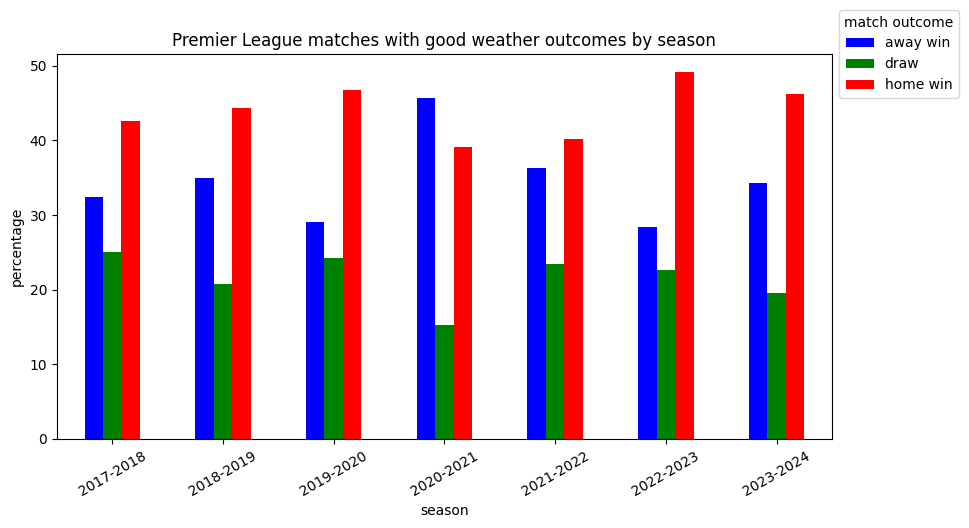

            away win       draw   home win
season                                    
2017-2018  32.352941  25.000000  42.647059
2018-2019  34.899329  20.805369  44.295302
2019-2020  28.994083  24.260355  46.745562
2020-2021  45.652174  15.217391  39.130435
2021-2022  36.312849  23.463687  40.223464
2022-2023  28.318584  22.566372  49.115044
2023-2024  34.319527  19.526627  46.153846
average    34.407070  21.548543  44.044387


In [49]:
plot_match_outcomes(foot_df[good_weather_ids], 'Premier League matches with good weather outcomes by season')

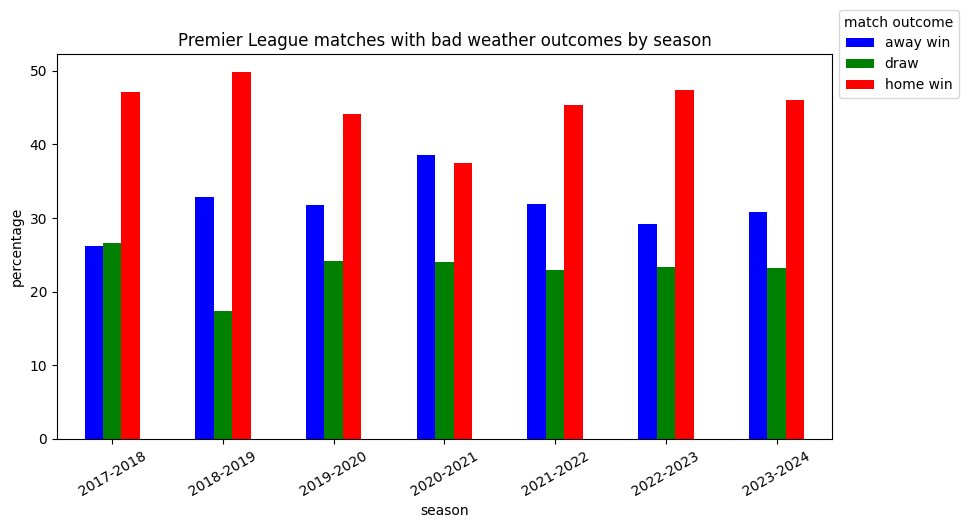

            away win       draw   home win
season                                    
2017-2018  26.229508  26.639344  47.131148
2018-2019  32.900433  17.316017  49.783550
2019-2020  31.753555  24.170616  44.075829
2020-2021  38.541667  23.958333  37.500000
2021-2022  31.840796  22.885572  45.273632
2022-2023  29.220779  23.376623  47.402597
2023-2024  30.805687  23.222749  45.971564
average    31.613204  23.081322  45.305474


In [50]:
plot_match_outcomes(foot_df[~good_weather_ids], 'Premier League matches with bad weather outcomes by season')

C:\Users\Kuba\AppData\Local\Temp\ipykernel_10696\3933823159.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_goals_num = df.groupby('season').apply(


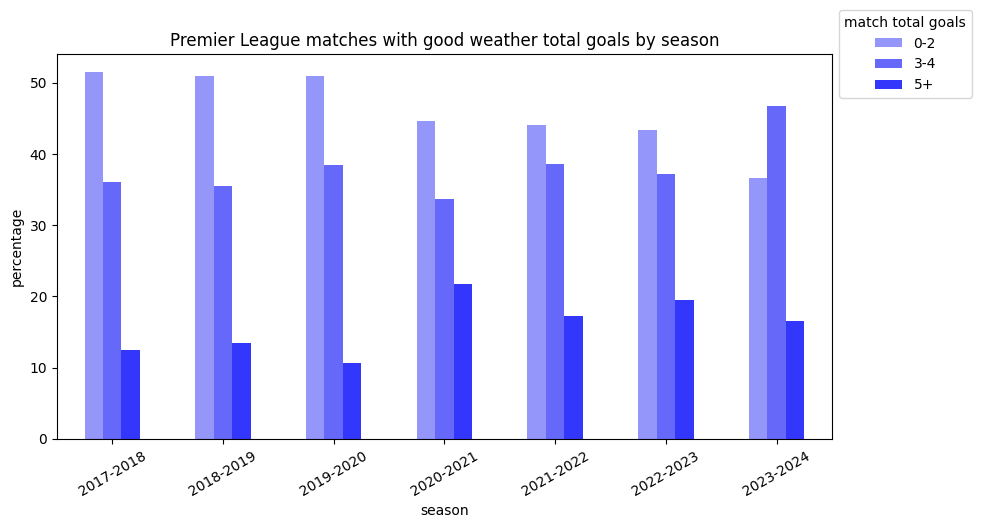

total_goals        0-2        3-4         5+
season                                      
2017-2018    51.470588  36.029412  12.500000
2018-2019    51.006711  35.570470  13.422819
2019-2020    50.887574  38.461538  10.650888
2020-2021    44.565217  33.695652  21.739130
2021-2022    44.134078  38.547486  17.318436
2022-2023    43.362832  37.168142  19.469027
2023-2024    36.686391  46.745562  16.568047
average      46.016199  38.031180  15.952621


In [51]:
plot_total_goals(foot_df[good_weather_ids], "Premier League matches with good weather total goals by season")

C:\Users\Kuba\AppData\Local\Temp\ipykernel_10696\3933823159.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_goals_num = df.groupby('season').apply(


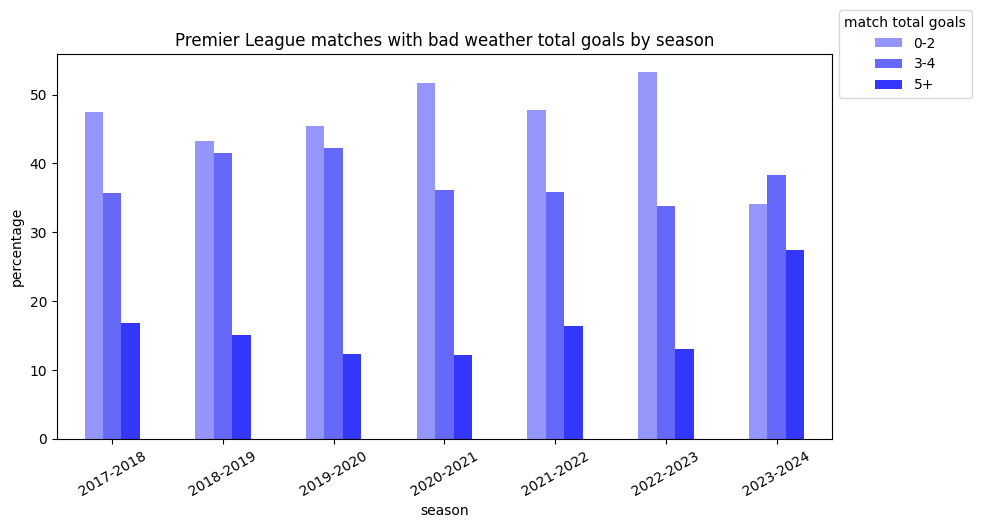

total_goals        0-2        3-4         5+
season                                      
2017-2018    47.540984  35.655738  16.803279
2018-2019    43.290043  41.558442  15.151515
2019-2020    45.497630  42.180095  12.322275
2020-2021    51.736111  36.111111  12.152778
2021-2022    47.761194  35.820896  16.417910
2022-2023    53.246753  33.766234  12.987013
2023-2024    34.123223  38.388626  27.488152
average      46.170848  37.640163  16.188989


In [52]:
plot_total_goals(foot_df[~good_weather_ids], "Premier League matches with bad weather total goals by season")

In [53]:
good_weather_ids=(foot_df['weather_temperature']>10) & (foot_df['weather_precipitation']<0.2) & (foot_df['weather_wind']<30)
bad_weather_ids = ~good_weather_ids

In [57]:
def performance_of_team_by_weather(df, weather_ids, team, date):

    team_weather_df = df.copy()
    team_weather_df = team_weather_df[((df['home_team'] == team) | (df['away_team'] == team)) & (df['datetime'] < date) & (weather_ids)].sort_values(by='datetime').tail(20)
    
    points = []
    for _, match in team_weather_df.iterrows():
        if match['home_team'] == team:
            points.append(match['home_points'])
        elif match['away_team'] == team:
            points.append(match['away_points'])
    if not points:
        return 1.0
    
    return sum(points)/len(points)

In [97]:
foot_df['home_avg_points_good_weather'] = foot_df.apply(
    lambda row: performance_of_team_by_weather(foot_df, good_weather_ids, row['home_team'], row['datetime']), axis=1
)
foot_df['home_avg_points_bad_weather'] = foot_df.apply(
    lambda row: performance_of_team_by_weather(foot_df, bad_weather_ids, row['home_team'], row['datetime']), axis=1
)

foot_df['away_avg_points_good_weather'] = foot_df.apply(
    lambda row: performance_of_team_by_weather(foot_df, good_weather_ids, row['away_team'], row['datetime']), axis=1
)
foot_df['away_avg_points_bad_weather'] = foot_df.apply(
    lambda row: performance_of_team_by_weather(foot_df, bad_weather_ids, row['away_team'], row['datetime']), axis=1
)

In [98]:
foot_df.tail()

,season,datetime,round,referee,formation_home,formation_away,home_team,away_team,home_minutes,home_goals,home_assists,home_pens_made,home_pens_att,home_shots,home_shots_on_target,home_cards_yellow,home_cards_red,home_touches,home_tackles,home_interceptions,home_blocks,home_xg,home_npxg,home_xg_assist,home_sca,home_gca,home_passes_completed,home_passes,home_passes_pct,home_progressive_passes,home_carries,home_progressive_carries,home_take_ons,home_take_ons_won,home_passes_total_distance,home_passes_progressive_distance,home_passes_completed_short,home_passes_short,home_passes_pct_short,home_passes_completed_medium,home_passes_medium,home_passes_pct_medium,home_passes_completed_long,home_passes_long,home_passes_pct_long,home_pass_xa,home_assisted_shots,home_passes_into_final_third,home_passes_into_penalty_area,home_crosses_into_penalty_area,home_passes_live,home_passes_dead,home_passes_free_kicks,home_through_balls,home_passes_switches,home_crosses,home_throw_ins,home_corner_kicks,home_corner_kicks_in,home_corner_kicks_out,home_corner_kicks_straight,home_passes_offsides,home_passes_blocked,home_tackles_won,home_tackles_def_3rd,home_tackles_mid_3rd,home_tackles_att_3rd,home_challenge_tackles,home_challenges,home_challenge_tackles_pct,home_challenges_lost,home_blocked_shots,home_blocked_passes,home_tackles_interceptions,home_clearances,home_errors,home_touches_def_pen_area,home_touches_def_3rd,home_touches_mid_3rd,home_touches_att_3rd,home_touches_att_pen_area,home_touches_live_ball,home_take_ons_won_pct,home_take_ons_tackled,home_take_ons_tackled_pct,home_carries_distance,home_carries_progressive_distance,home_carries_into_final_third,home_carries_into_penalty_area,home_miscontrols,home_dispossessed,home_passes_received,home_progressive_passes_received,home_cards_yellow_red,home_fouls,home_fouled,home_offsides,home_pens_won,home_pens_conceded,home_own_goals,home_ball_recoveries,home_aerials_won,home_aerials_lost,home_aerials_won_pct,away_minutes,away_goals,away_assists,away_pens_made,away_pens_att,away_shots,away_shots_on_target,away_cards_yellow,away_cards_red,away_touches,away_tackles,away_interceptions,away_blocks,away_xg,away_npxg,away_xg_assist,away_sca,away_gca,away_passes_completed,away_passes,away_passes_pct,away_progressive_passes,away_carries,away_progressive_carries,away_take_ons,away_take_ons_won,away_passes_total_distance,away_passes_progressive_distance,away_passes_completed_short,away_passes_short,away_passes_pct_short,away_passes_completed_medium,away_passes_medium,away_passes_pct_medium,away_passes_completed_long,away_passes_long,away_passes_pct_long,away_pass_xa,away_assisted_shots,away_passes_into_final_third,away_passes_into_penalty_area,away_crosses_into_penalty_area,away_passes_live,away_passes_dead,away_passes_free_kicks,away_through_balls,away_passes_switches,away_crosses,away_throw_ins,away_corner_kicks,away_corner_kicks_in,away_corner_kicks_out,away_corner_kicks_straight,away_passes_offsides,away_passes_blocked,away_tackles_won,away_tackles_def_3rd,away_tackles_mid_3rd,away_tackles_att_3rd,away_challenge_tackles,away_challenges,away_challenge_tackles_pct,away_challenges_lost,away_blocked_shots,away_blocked_passes,away_tackles_interceptions,away_clearances,away_errors,away_touches_def_pen_area,away_touches_def_3rd,away_touches_mid_3rd,away_touches_att_3rd,away_touches_att_pen_area,away_touches_live_ball,away_take_ons_won_pct,away_take_ons_tackled,away_take_ons_tackled_pct,away_carries_distance,away_carries_progressive_distance,away_carries_into_final_third,away_carries_into_penalty_area,away_miscontrols,away_dispossessed,away_passes_received,away_progressive_passes_received,away_cards_yellow_red,away_fouls,away_fouled,away_offsides,away_pens_won,away_pens_conceded,away_own_goals,away_ball_recoveries,away_aerials_won,away_aerials_lost,away_aerials_won_pct,home_goals_conceded,away_goals_conceded,outcome,home_points,away_points,home_goals_last5,home_assists_last5,home_pens_made_last5,home_pens_att_last5,home

In [99]:
foot_df[(foot_df["home_avg_points_good_weather"]- foot_df["home_avg_points_bad_weather"])>1].head(15)

,season,datetime,round,referee,formation_home,formation_away,home_team,away_team,home_minutes,home_goals,home_assists,home_pens_made,home_pens_att,home_shots,home_shots_on_target,home_cards_yellow,home_cards_red,home_touches,home_tackles,home_interceptions,home_blocks,home_xg,home_npxg,home_xg_assist,home_sca,home_gca,home_passes_completed,home_passes,home_passes_pct,home_progressive_passes,home_carries,home_progressive_carries,home_take_ons,home_take_ons_won,home_passes_total_distance,home_passes_progressive_distance,home_passes_completed_short,home_passes_short,home_passes_pct_short,home_passes_completed_medium,home_passes_medium,home_passes_pct_medium,home_passes_completed_long,home_passes_long,home_passes_pct_long,home_pass_xa,home_assisted_shots,home_passes_into_final_third,home_passes_into_penalty_area,home_crosses_into_penalty_area,home_passes_live,home_passes_dead,home_passes_free_kicks,home_through_balls,home_passes_switches,home_crosses,home_throw_ins,home_corner_kicks,home_corner_kicks_in,home_corner_kicks_out,home_corner_kicks_straight,home_passes_offsides,home_passes_blocked,home_tackles_won,home_tackles_def_3rd,home_tackles_mid_3rd,home_tackles_att_3rd,home_challenge_tackles,home_challenges,home_challenge_tackles_pct,home_challenges_lost,home_blocked_shots,home_blocked_passes,home_tackles_interceptions,home_clearances,home_errors,home_touches_def_pen_area,home_touches_def_3rd,home_touches_mid_3rd,home_touches_att_3rd,home_touches_att_pen_area,home_touches_live_ball,home_take_ons_won_pct,home_take_ons_tackled,home_take_ons_tackled_pct,home_carries_distance,home_carries_progressive_distance,home_carries_into_final_third,home_carries_into_penalty_area,home_miscontrols,home_dispossessed,home_passes_received,home_progressive_passes_received,home_cards_yellow_red,home_fouls,home_fouled,home_offsides,home_pens_won,home_pens_conceded,home_own_goals,home_ball_recoveries,home_aerials_won,home_aerials_lost,home_aerials_won_pct,away_minutes,away_goals,away_assists,away_pens_made,away_pens_att,away_shots,away_shots_on_target,away_cards_yellow,away_cards_red,away_touches,away_tackles,away_interceptions,away_blocks,away_xg,away_npxg,away_xg_assist,away_sca,away_gca,away_passes_completed,away_passes,away_passes_pct,away_progressive_passes,away_carries,away_progressive_carries,away_take_ons,away_take_ons_won,away_passes_total_distance,away_passes_progressive_distance,away_passes_completed_short,away_passes_short,away_passes_pct_short,away_passes_completed_medium,away_passes_medium,away_passes_pct_medium,away_passes_completed_long,away_passes_long,away_passes_pct_long,away_pass_xa,away_assisted_shots,away_passes_into_final_third,away_passes_into_penalty_area,away_crosses_into_penalty_area,away_passes_live,away_passes_dead,away_passes_free_kicks,away_through_balls,away_passes_switches,away_crosses,away_throw_ins,away_corner_kicks,away_corner_kicks_in,away_corner_kicks_out,away_corner_kicks_straight,away_passes_offsides,away_passes_blocked,away_tackles_won,away_tackles_def_3rd,away_tackles_mid_3rd,away_tackles_att_3rd,away_challenge_tackles,away_challenges,away_challenge_tackles_pct,away_challenges_lost,away_blocked_shots,away_blocked_passes,away_tackles_interceptions,away_clearances,away_errors,away_touches_def_pen_area,away_touches_def_3rd,away_touches_mid_3rd,away_touches_att_3rd,away_touches_att_pen_area,away_touches_live_ball,away_take_ons_won_pct,away_take_ons_tackled,away_take_ons_tackled_pct,away_carries_distance,away_carries_progressive_distance,away_carries_into_final_third,away_carries_into_penalty_area,away_miscontrols,away_dispossessed,away_passes_received,away_progressive_passes_received,away_cards_yellow_red,away_fouls,away_fouled,away_offsides,away_pens_won,away_pens_conceded,away_own_goals,away_ball_recoveries,away_aerials_won,away_aerials_lost,away_aerials_won_pct,home_goals_conceded,away_goals_conceded,outcome,home_points,away_points,home_goals_last5,home_assists_last5,home_pens_made_last5,home_pens_att_last5,home

In [100]:
corr_matrix = foot_df[[
    "home_avg_points_good_weather", 
    "home_avg_points_bad_weather", 
    "away_avg_points_good_weather", 
    "away_avg_points_bad_weather"
]].corr()

corr_matrix

,home_avg_points_good_weather,home_avg_points_bad_weather,away_avg_points_good_weather,away_avg_points_bad_weather
home_avg_points_good_weather,1.000000,0.598143,-0.014203,-0.005771
home_avg_points_bad_weather,0.598143,1.000000,-0.027251,-0.024023
away_avg_points_good_weather,-0.014203,-0.027251,1.000000,0.596577
away_avg_points_bad_weather,-0.005771,-0.024023,0.596577,1.000000


In [114]:
foot_df["good_to_bad_weather_win_ratio"] = (
    foot_df["home_avg_points_good_weather"] / (foot_df["home_avg_points_bad_weather"] + epsilon)
)

foot_df["good_to_bad_weather_win_ratio"] = np.where(
    foot_df["good_to_bad_weather_win_ratio"] > 20, 1, foot_df["good_to_bad_weather_win_ratio"]
)

team_weather_condition_points = foot_df.groupby('home_team')["good_to_bad_weather_win_ratio"].mean()

print(team_weather_condition_points.mean())
print(team_weather_condition_points)

1.0923131382416453
home_team
Arsenal                    1.104861
Aston Villa                1.155513
Bournemouth                1.273611
Brentford                  0.986117
Brighton & Hove Albion     1.173678
Burnley                    1.169458
Cardiff City               1.254216
Chelsea                    1.099867
Crystal Palace             1.434091
Everton                    1.206425
Fulham                     0.887380
Huddersfield Town          1.144139
Leeds United               0.972458
Leicester City             0.907184
Liverpool                  0.907216
Luton Town                 0.212099
Manchester City            0.959242
Manchester United          0.953081
Newcastle United           1.049595
Norwich City               0.667194
Nottingham Forest          1.163299
Sheffield United           0.944041
Southampton                1.029205
Stoke City                 1.544385
Swansea City               1.534355
Tottenham Hotspur          1.055166
Watford                    1.341929